# Приют для животных в Блумингтоне

## Описание датасета
В начале 2017 года Приют для животных в Блумингтоне перенес программное обеспечение для управления с AnimalShelterNet на Shelter Manager. Мы попытались сохранить как можно больше информации из старой системы. Поля результатов в приюте для животных разбросаны по нескольким полям, а не только по одному, например, "Умер по прибытии", "Усыплен", "Тип перемещения" и другие рассматриваются как часть результата.

Анализируя набор данных, мы можем узнать, что повлияет на усыновление животных, какая особенность, вероятно, повлияет на истории этих животных.

### Описание данных 
* "идентификатор",

* "дата приема", 

* "причина приема",

* "является переводом",

* "код приюта",

* "идентификационный номер",

* "кличка животного",

* "название породы", 

* "базовый цвет",

* "название вида",

* "возраст животного", 

* "название пола",

* 'местоположение",

* "дата перемещения",

* "тип перемещения", 

* "является испытательным сроком",

* "дата возврата",

* "причина возврата",

* "дата смерти", 

* "умерший",

* "умер в приюте", 

* "усыплен",

# Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st

import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('animal.csv')

In [3]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


## Дубликаты и пропуски 

In [4]:
df.duplicated().sum()

0

In [5]:
def draw_missing(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count())*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing(df)

,Total,Percent
id,0,0.000000
intakedate,0,0.000000
intakereason,2,0.019436
istransfer,0,0.000000
sheltercode,0,0.000000
identichipnumber,1966,19.105928
animalname,0,0.000000
breedname,45,0.437318
basecolour,0,0.000000
speciesname,0,0.000000


Пропуски выявлены в столбцах идентификационный номер животного, порода, испытательный срок, дата возврата, дата сметри. 

* Пропуски в дате сметри может означать, то, что на данный момент собра информации животное было живо, что не может не радовать, ведь их количество подавляющее большинство 

* Пропуски в породе - может означать, что это бездомное животное - без породистое 

* Пропуски в дате возврата - означают, что на данный момент сбора информации животное еще находилось в приюте 

* Пропуски в id - не информативны, поэтому данный столбец можно не брать во внимание

In [6]:
df['age']=df['animalage'].str.split(' ',expand=True)[0]

In [7]:
df['age'] = df['age'].astype(int)

Сделаем дополнительный датафрейм, в котором будем хранить информацию об умерших собаках, чтобы в дальнейшем проанализировать и выявить закономерность их смерти.

In [8]:
df = df.drop(columns=['identichipnumber', 'isdoa'],axis = 1 )

In [9]:
decease = df[~df['deceaseddate'].isnull()]

In [10]:
decease.head()

,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,age
12,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,...,2017-03-25 00:00:00,Foster,0.0,2017-04-07 00:00:00,Stray,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,12
13,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,...,2017-04-07 00:00:00,Adoption,0.0,2018-02-09 00:00:00,Incompatible with owner lifestyle,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,12
33,47360,2017-02-11 00:00:00,Abandoned,0,C17021370,Calli,DSH/Unknown,Various,Cat,16 years 3 months.,...,2017-03-07 00:00:00,Foster,0.0,2017-04-22 00:00:00,Stray,2017-06-13 00:00:00,"UU - untreatable, unmanageable",0,1,16
34,47360,2017-02-11 00:00:00,Abandoned,0,C17021370,Calli,DSH/Unknown,Various,Cat,16 years 3 months.,...,2017-04-25 00:00:00,Foster,0.0,2017-06-11 00:00:00,Stray,2017-06-13 00:00:00,"UU - untreatable, unmanageable",0,1,16
35,47360,2017-02-11 00:00:00,Abandoned,0,C17021370,Calli,DSH/Unknown,Various,Cat,16 years 3 months.,...,2017-06-12 00:00:00,Foster,0.0,2017-06-13 00:00:00,Stray,2017-06-13 00:00:00,"UU - untreatable, unmanageable",0,1,16


Сделаем дополнительный датафрейм, в котором будем хранить информацию об оставленных собаках, чтобы в дальнейшем проанализировать и выявить закономерность, почему их не забирают.

In [11]:
return_anim = df[~df['returndate'].isnull()]

In [12]:
return_anim.head()

,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,age
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,8
5,31469,2013-03-26 00:00:00,Incompatible with owner lifestyle,0,D1303720,Bonnie,Basenji/Mix,Brown and White,Dog,5 years 11 months.,...,2013-03-30 00:00:00,Adoption,0.0,2017-05-08 00:00:00,Incompatible with owner lifestyle,NaN,Died in care,0,0,5
9,46238,2016-10-09 00:00:00,Abandoned,0,D16103207,Tennessee,Heeler/Mix,Brown and Black,Dog,3 years 2 months.,...,2016-11-26 00:00:00,Foster,0.0,2017-07-23 00:00:00,Stray,NaN,Died in care,0,0,3
10,46238,2016-10-09 00:00:00,Abandoned,0,D16103207,Tennessee,Heeler/Mix,Brown and Black,Dog,3 years 2 months.,...,2017-08-09 00:00:00,Foster,0.0,2018-02-14 00:00:00,Stray,NaN,Died in care,0,0,3
12,46437,2016-10-26 00:00:00,Abandoned,0,C16103406,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,...,2017-03-25 00:00:00,Foster,0.0,2017-04-07 00:00:00,Stray,2018-02-10 00:00:00,"UU - untreatable, unmanageable",0,1,12


Удалим из датафрейма столбцы про смерть собаки и была ли она отдана новым хозяевым. Отдельно проанализируем эти столбцы

In [13]:
df = df.drop(columns=['deceaseddate', 'returndate'],axis = 1 )

# EDA

In [14]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'animalname', 'breedname', 'basecolour', 'speciesname', 'animalage',
       'sexname', 'location', 'movementdate', 'movementtype', 'istrial',
       'returnedreason', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'age'],
      dtype='object')

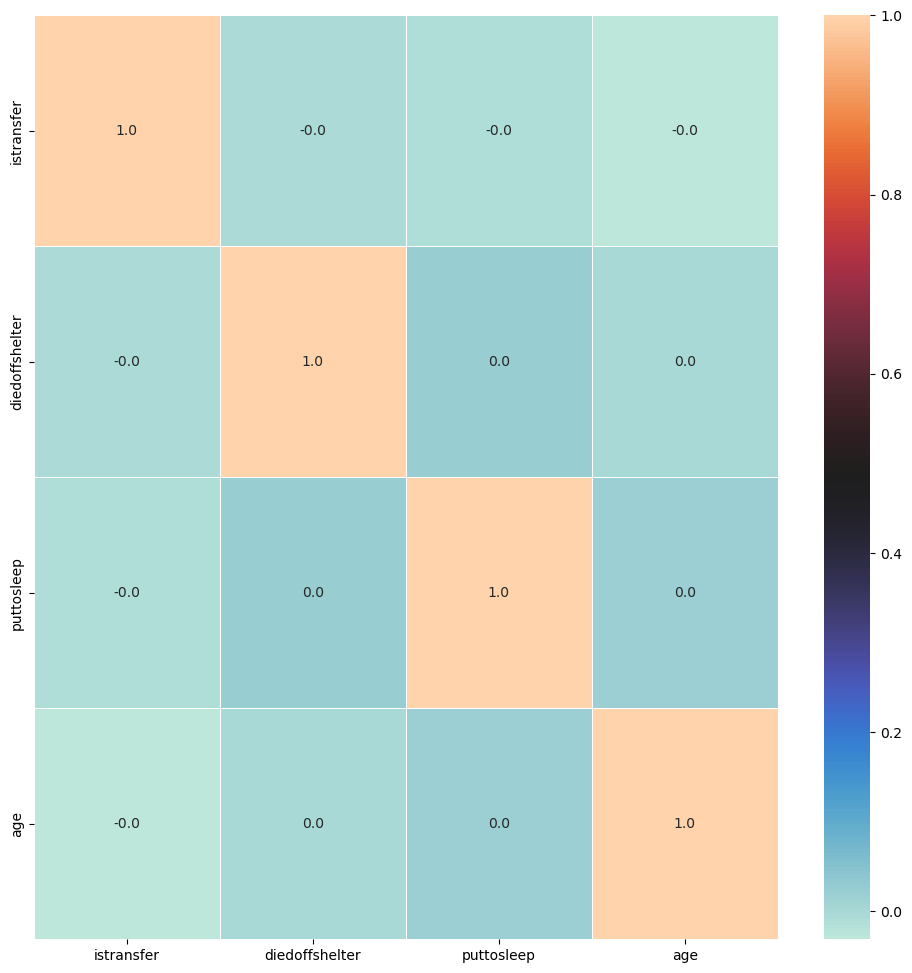

In [15]:
f,ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df[['intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'animalname', 'breedname', 'basecolour', 'speciesname', 'animalage',
       'sexname', 'location', 'movementdate', 'movementtype',
       'returnedreason', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'age']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire");

In [16]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'animalname', 'breedname', 'basecolour', 'speciesname', 'animalage',
       'sexname', 'location', 'movementdate', 'movementtype', 'istrial',
       'returnedreason', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'age'],
      dtype='object')

In [17]:
df['intakedate'] = pd.to_datetime(df.intakedate)
df['movementdate'] = pd.to_datetime(df.movementdate)


df['year_take']=df.intakedate.dt.year
df['month_take']=df.intakedate.dt.month
df['day_take']=df.intakedate.dt.day

df['year_move']=df.movementdate.dt.year
df['month_move']=df.movementdate.dt.month
df['day_move']=df.movementdate.dt.day

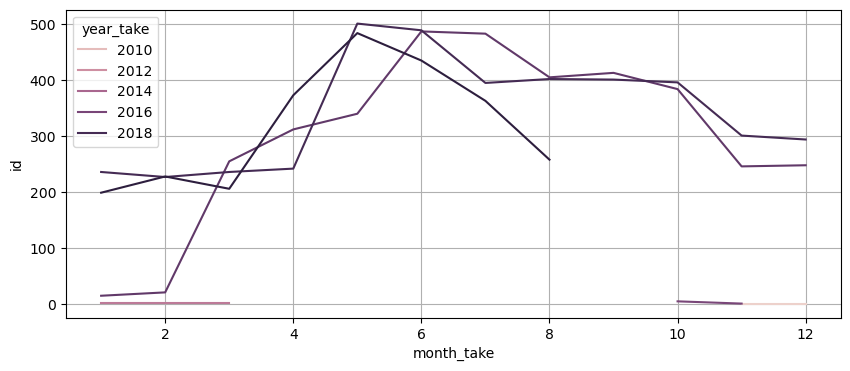

In [18]:
group_year=df.groupby(['month_take','year_take'],as_index=False).count()

plt.figure(figsize=(10,4))
sns.lineplot(x="month_take",y='id', hue='year_take', data=group_year)
plt.grid()
plt.show()

Похоже, что каждый год весной в приюте будет больше приемных животных, вероятно, потому, что в это время животные рожают, что приведет к увеличению их числа.

## Проанализируем датафрейм по умершим животным 

In [19]:
decease.describe().T

,count,mean,std,min,25%,50%,75%,max
id,326.0,59422.601227,3050.004869,46437.0,57235.5,59718.5,61384.0,64504.0
istransfer,326.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
istrial,325.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
diedoffshelter,326.0,0.082822,0.276037,0.0,0.0,0.0,0.0,1.0
puttosleep,326.0,0.546012,0.498644,0.0,0.0,1.0,1.0,1.0
age,326.0,6.266871,5.272215,1.0,2.0,5.0,9.0,30.0


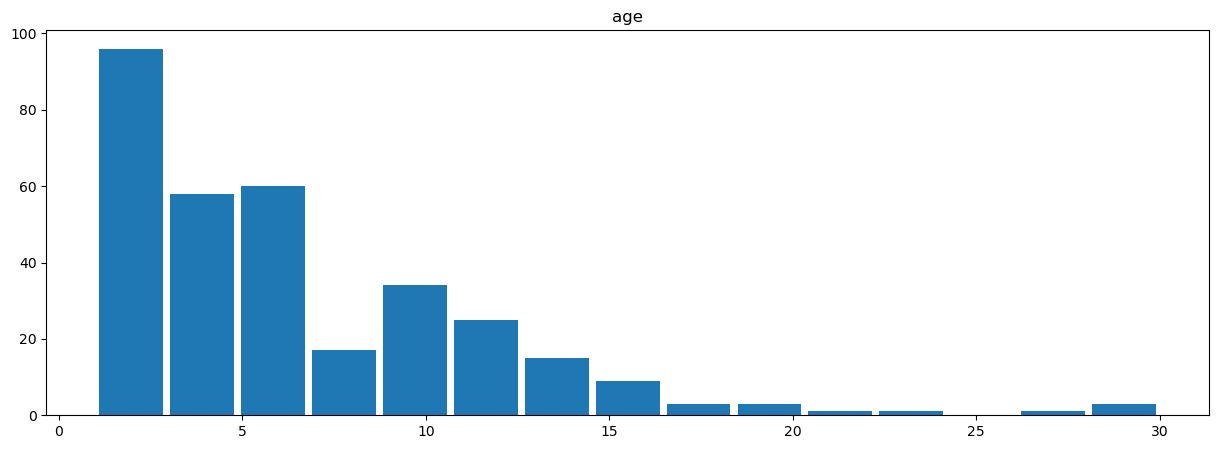

In [20]:
decease.hist(column='age', bins=15, grid=False, figsize=(15,5), zorder=2, rwidth=0.9)
plt.show();

In [21]:
decease.age.value_counts()

2     51
1     45
6     31
3     30
5     29
4     28
10    20
12    14
9     14
14    12
11    11
7      9
8      8
16     5
15     4
13     3
18     3
19     3
30     3
28     1
24     1
21     1
Name: age, dtype: int64

Грустная статистка, но факт остается фактом, в основном умирают животные возраста от **2 до 6 лет**

### Какие животные чаще всего умирают?

In [22]:
def catplot(df, x):
    sns.catplot(data=df, x=x, kind='count', palette="Pastel2") 
    plt.xticks(rotation=90)

In [23]:
columns = ['intakereason', 'sexname', 'location',  'deceasedreason']

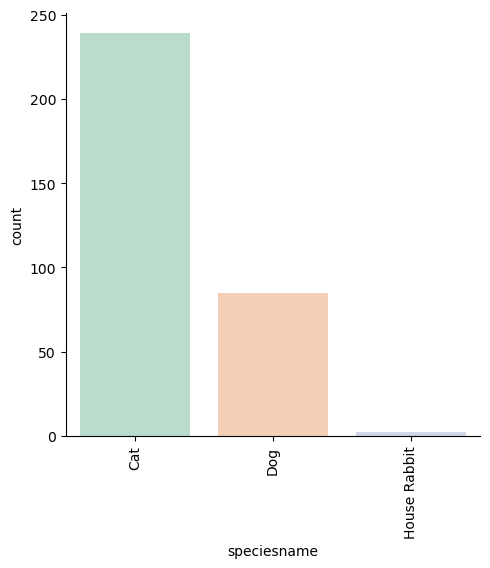

In [24]:
catplot(decease, 'speciesname')
    
plt.show()

In [25]:
df.speciesname.value_counts().head()

Cat             5749
Dog             3900
House Rabbit     218
Rat              130
Guinea Pig        93
Name: speciesname, dtype: int64

Так как кроликов в приюте подавляющее меньшинство, то не будем анализировать их смертность. 

Сделаем срез данны по кошкам и собакам 

### Кошки
### Гипотеза. Чаще всего умирают бродячие кошки

In [26]:
cat = decease.query('speciesname == "Cat"')

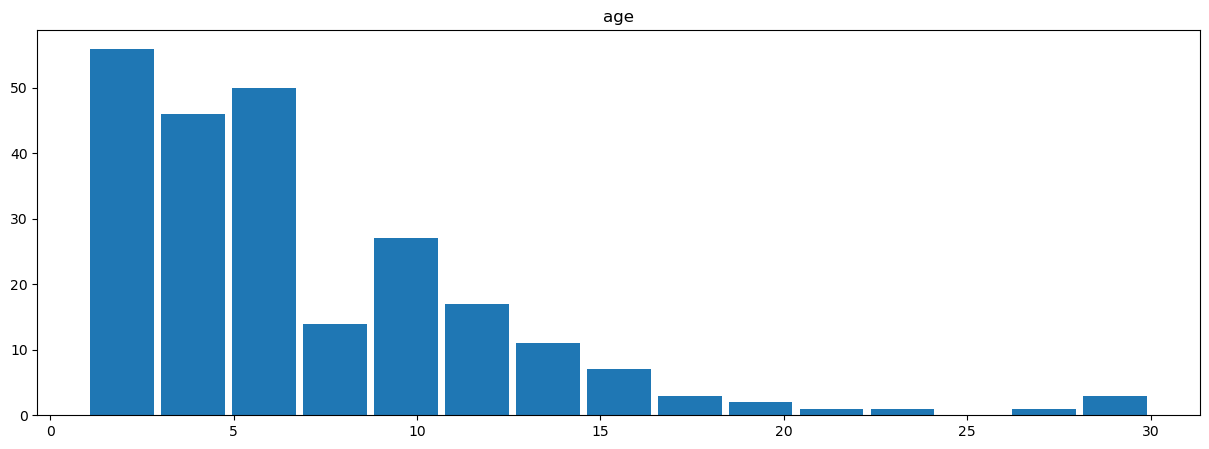

In [27]:
cat.hist(column='age', bins=15, grid=False, figsize=(15,5), zorder=2, rwidth=0.9)
plt.show();

In [28]:
cat.age.value_counts()

2     34
6     28
3     23
4     23
1     22
5     22
10    17
12    11
9     10
14     8
8      7
7      7
11     6
16     4
18     3
15     3
30     3
13     3
19     2
24     1
21     1
28     1
Name: age, dtype: int64

Кошки чаще всего умирают в возрасте от **2 до 6 лет**

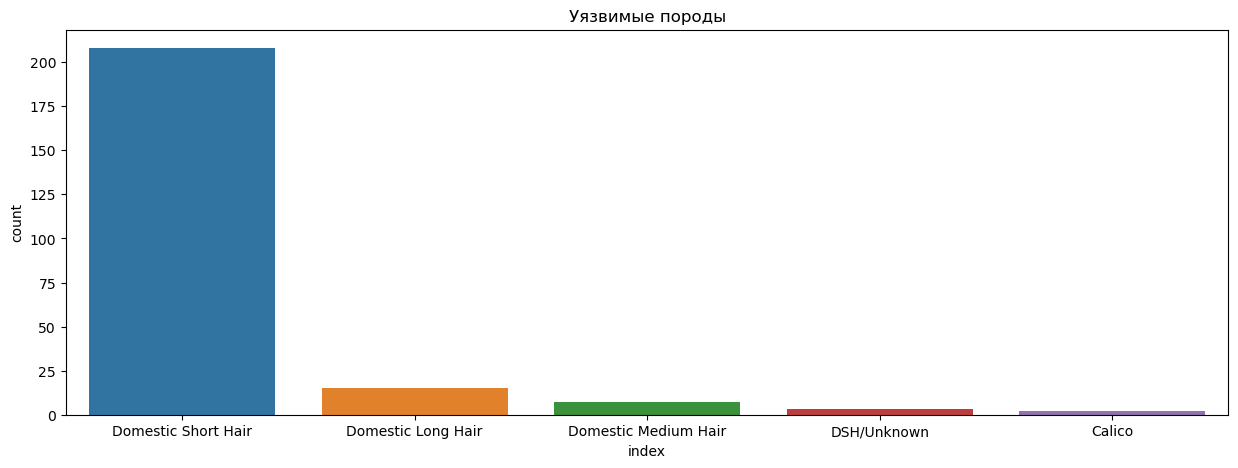

In [29]:
content = cat.breedname.value_counts().reset_index().rename(columns = {'breedname' : 'count'}).sort_values('count', ascending = False).head()

plt.figure(figsize = (15,5))

plt.title("Уязвимые породы")

sns.barplot(x=content['index'], y=content["count"])
plt.show();

Среди кошек чаще всего умирают домашние короткошерстные животные.

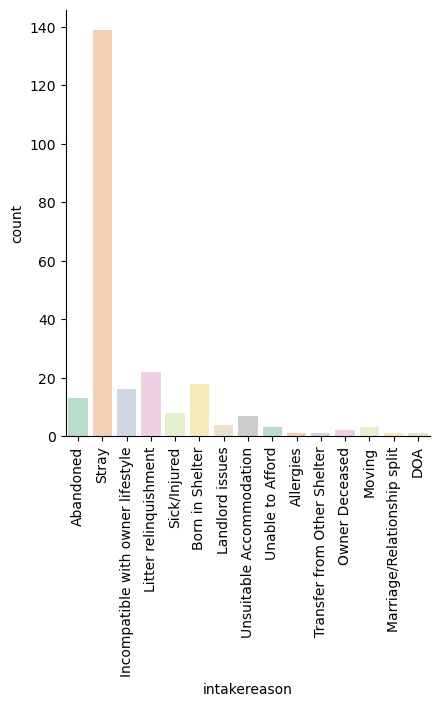

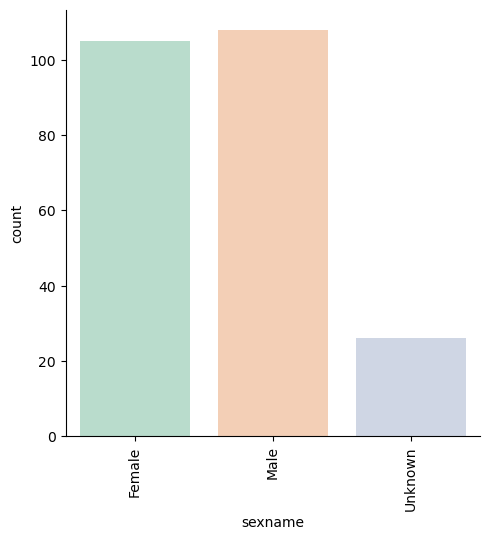

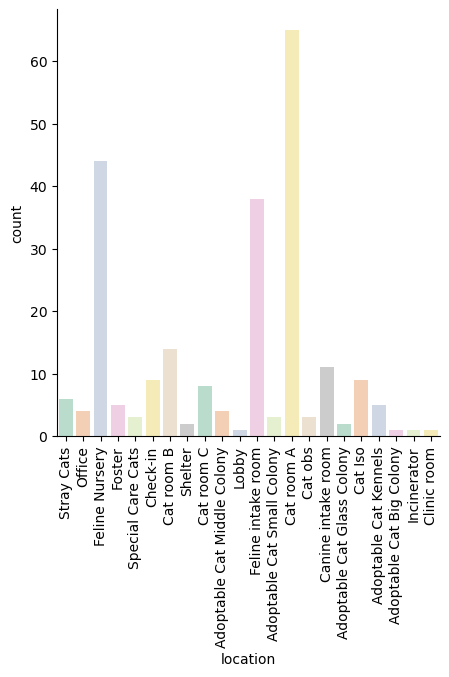

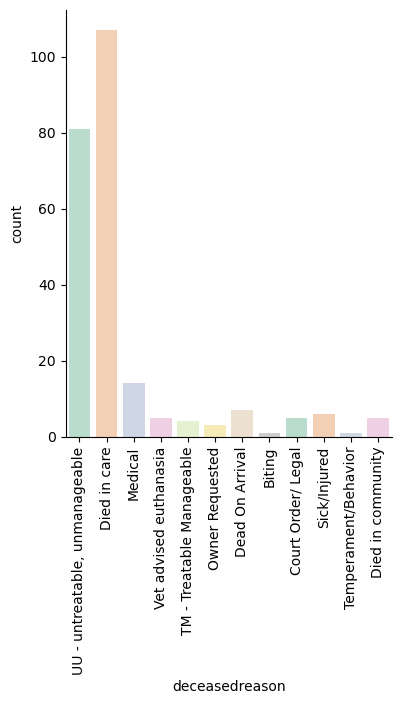

In [30]:
for col in columns:
    catplot(cat, col)
    
plt.show()

Чаще всего умирают бродячие кошки, мужского пола, в вальере номер А, которые были возвращены в приют, но при этом умирали они в заботе

Это легко объясняется тем, что бродячие кошки более уязвимы к лишаю и прочим заболеваниям, которым должны лечиться в ветклиниках, чего нет в приютах 

Гипотеза подтвердилась.

### Собаки

### Гипотеза. Чаще всего собаки умирают от бешенства

In [31]:
dog = decease.query('speciesname == "Dog"')

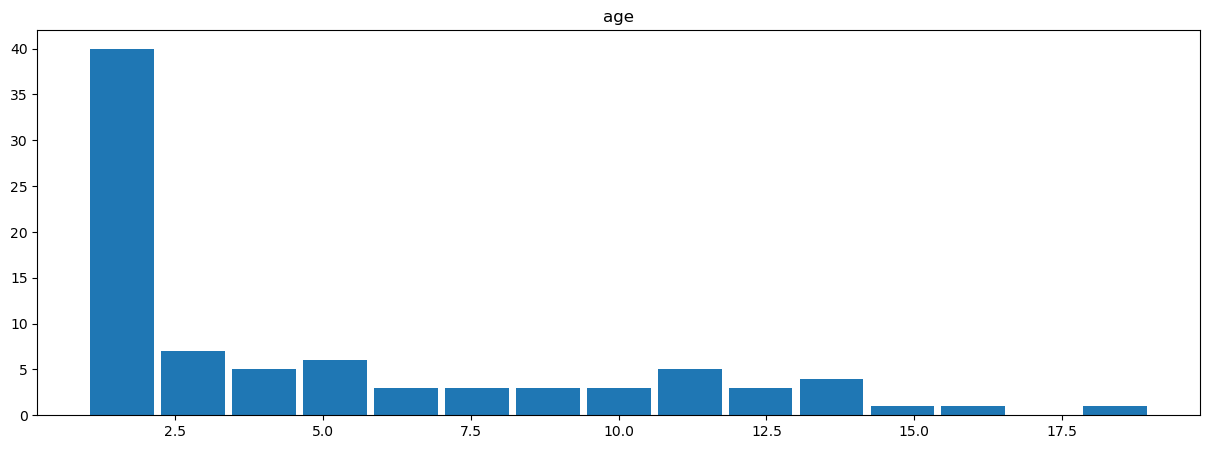

In [32]:
dog.hist(column='age', bins=15, grid=False, figsize=(15,5), zorder=2, rwidth=0.9)
plt.show();

In [33]:
dog.age.value_counts()

1     23
2     17
3      7
5      6
11     5
4      5
14     4
10     3
6      3
12     3
9      3
7      2
8      1
16     1
15     1
19     1
Name: age, dtype: int64

Статистика по собакам намного хуже, чем у кошек чаще всего они умирают в возрасте **от 1 до 2 лет**

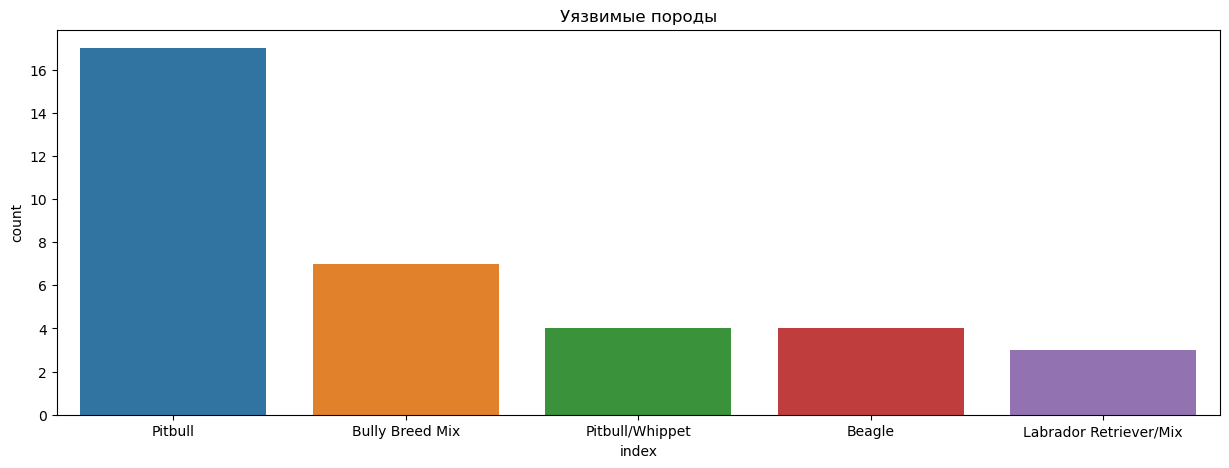

In [34]:
content = dog.breedname.value_counts().reset_index().rename(columns = {'breedname' : 'count'}).sort_values('count', ascending = False).head()

plt.figure(figsize = (15,5))

plt.title("Уязвимые породы")

sns.barplot(x=content['index'], y=content["count"])
plt.show();

Среди собак чаще всего умирают питбули

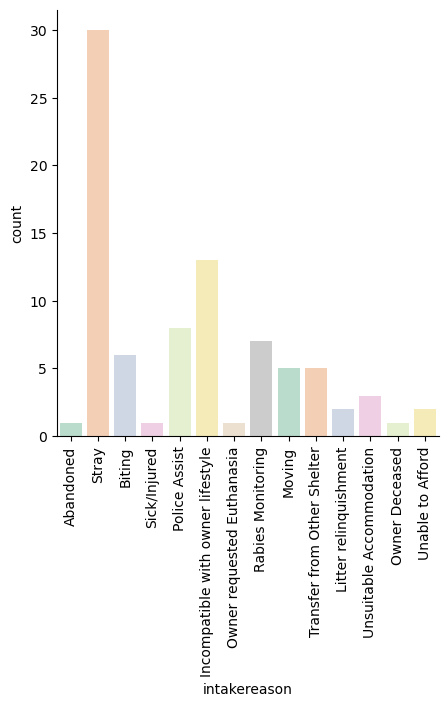

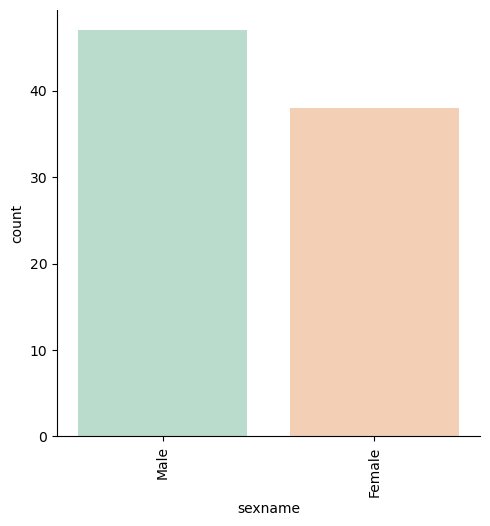

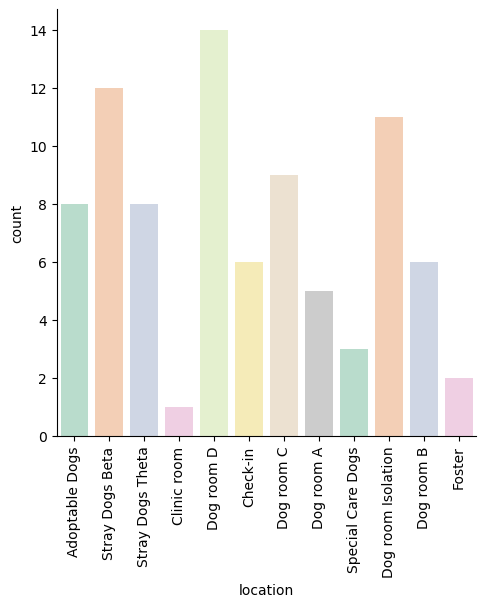

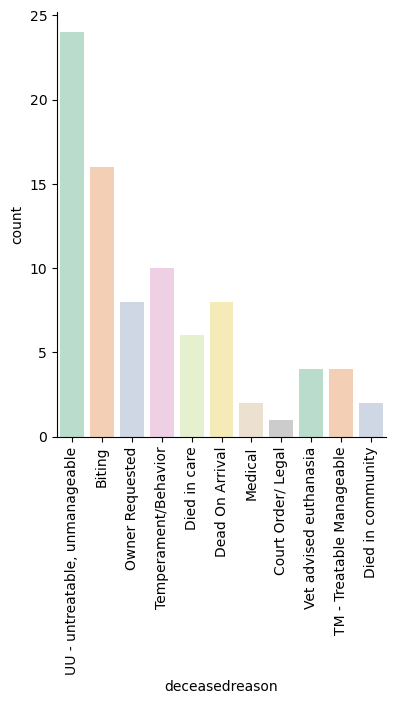

In [35]:
for col in columns:
    catplot(dog, col)
    
plt.show()

Чаще всего умирают бродячие собаки, мужского пола, в вальере номер из-за усыпления от бешенства.

Заразиться бешенством можно лишь через кровь, слюну, биологические жидкости. Нельзя его подхватить через мочу, съев или понюхав что-то. Так собаки более агресивны и чаще впадают в драки между друг другом вероятность заразиться у них выше, поэтому и смерность по этому поводу у них выше

Гипотеза подтвердилась.

## Вывод 

1) Чаще всего в приюте умирают кошки, но это скорее всего можно объяснить тем, что в самой выборке датафрейма кошек в 1,5 раза больше, чем собак, поэтому считать, что это закономерность из-за типа животных не стоит 

2) Подавляющее большинство умерло бродячих животных 

3) И если причина смерти у кошки была смерть в заботе, те скорее всего естественным причинам, то собак чаще всего усыпляли из-за бешенства 

## Живые животные

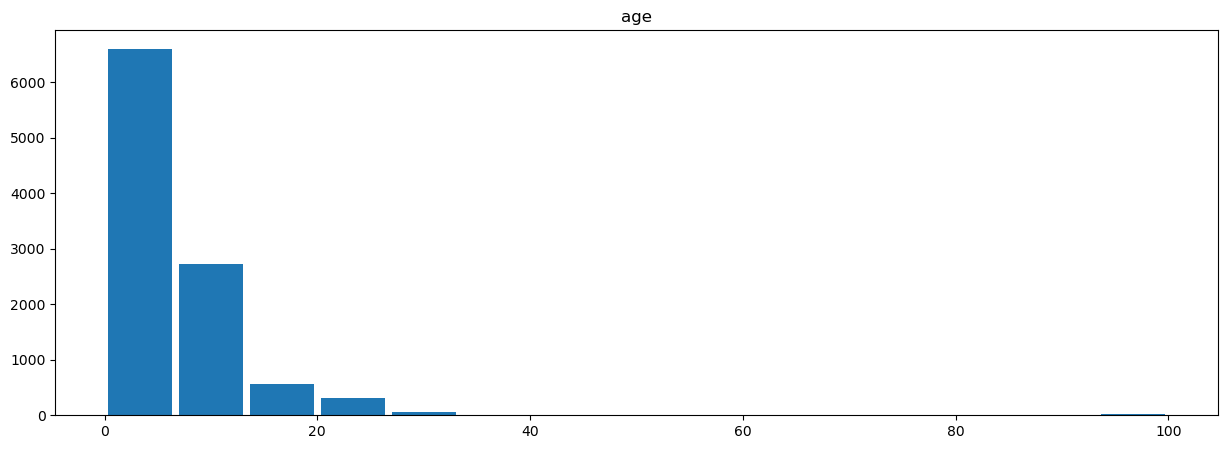

In [36]:
df.hist(column='age', bins=15, grid=False, figsize=(15,5), zorder=2, rwidth=0.9)
plt.show();

In [37]:
df.age.value_counts().head(10)

1     2948
2     1461
3      731
6      546
7      529
11     522
4      515
10     460
9      447
5      406
Name: age, dtype: int64

Подавляющее большинство животных находятся в приюте в возрасте от 1 до 2 лет.
Сделаем категоризацию данных по возрасту, что бы выдвинуть и проанализировать гипотезы связанные с возрастом животных

In [38]:
def age_cat (df):
    if df.age <3 :
        return 'babies'
    elif df.age>=3  and df.age<=5 :
        return 'young'
    elif df.age>=6  and df.age<=15 :
        return 'adult'
    else:
        return 'old'

    
df['age_cat'] = df.apply(age_cat, axis = 1)


/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


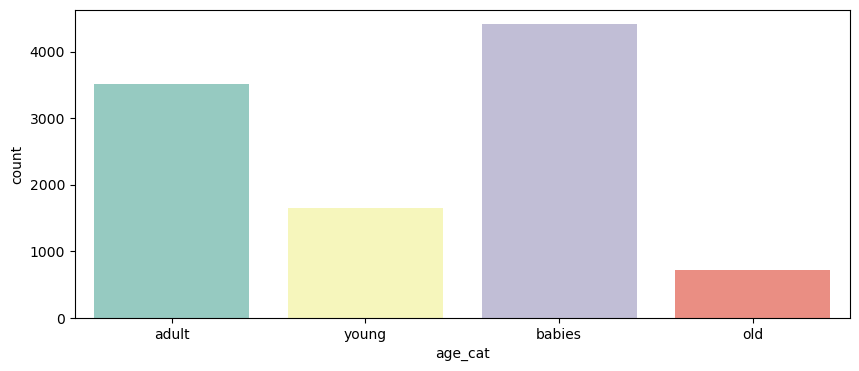

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(df.age_cat, palette='Set3')

plt.show()

In [40]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,animalage,...,diedoffshelter,puttosleep,age,year_take,month_take,day_take,year_move,month_move,day_move,age_cat
0,15801,2009-11-28,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,9 years 2 months.,...,0,0,9,2009,11,28,2017,5,13,adult
1,15932,2009-12-08,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,9 years 1 month.,...,0,0,9,2009,12,8,2017,4,24,adult
2,28859,2012-08-10,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,6 years 8 months.,...,0,0,6,2012,8,10,2017,4,15,adult
3,30812,2013-01-11,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,0,0,8,2013,1,11,2017,4,18,adult
4,30812,2013-01-11,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,8 years 11 months.,...,0,0,8,2013,1,11,2018,5,29,adult


### Гипотеза. В основном в приют попадают взрослые и молодые  животные

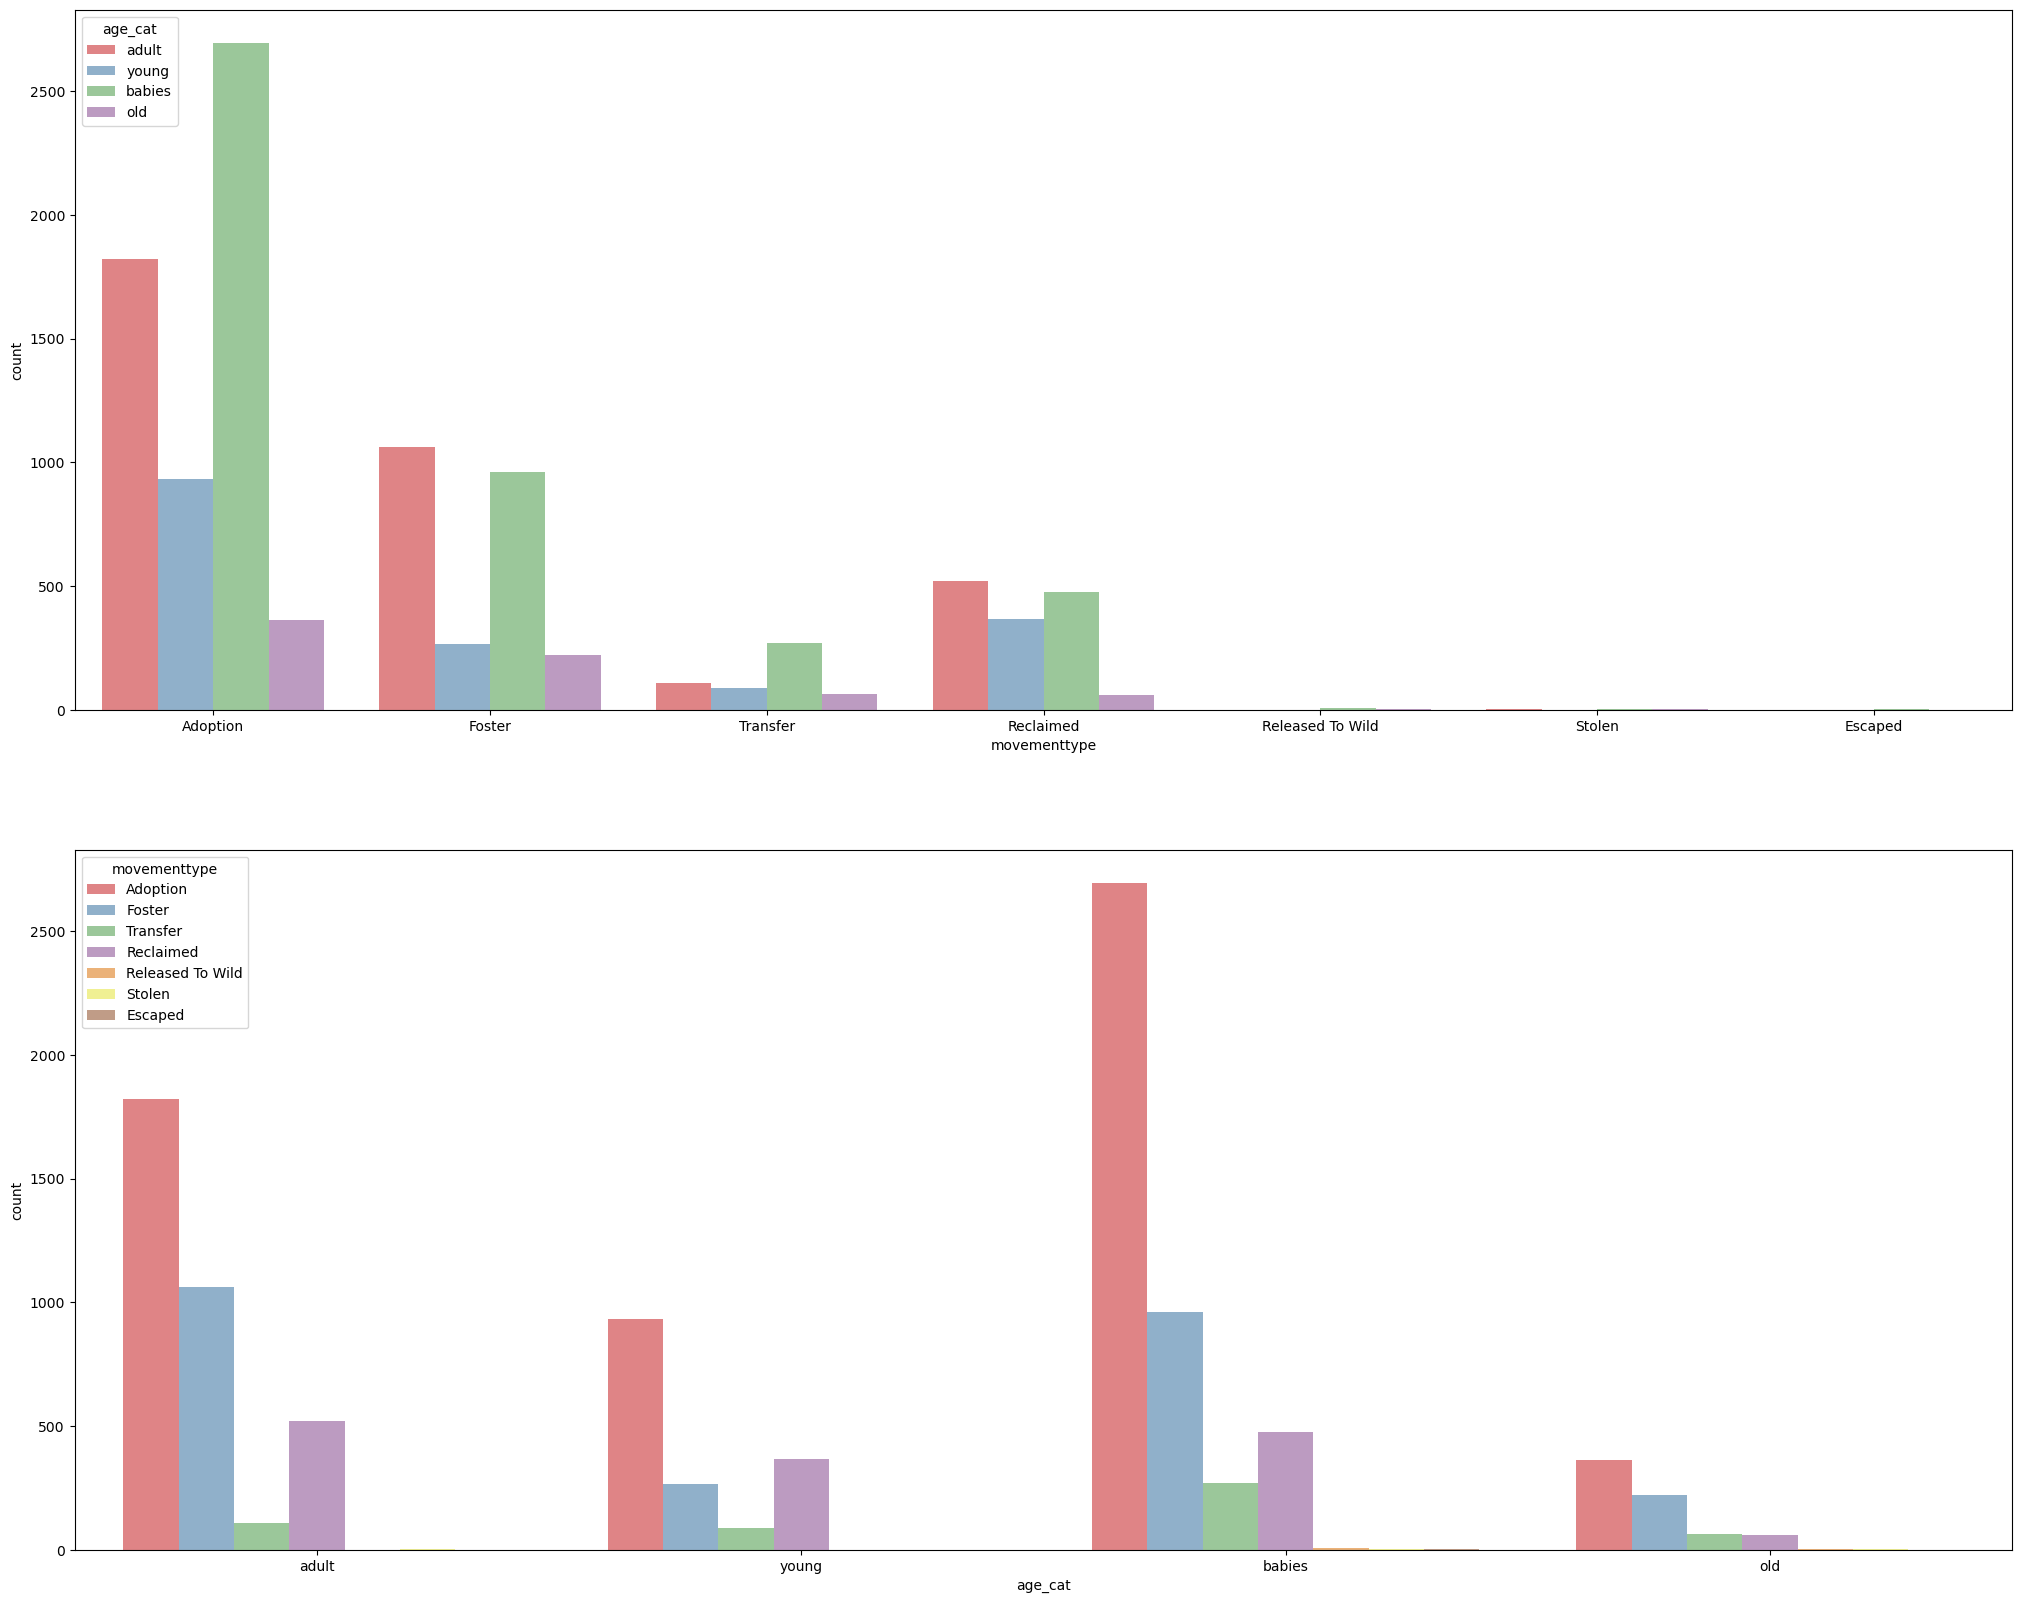

In [41]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(25,20))
sns.countplot(data=df, x='movementtype',hue='age_cat', ax=ax1,
             palette='Set1', alpha=0.6)
sns.countplot(data=df, x='age_cat',hue='movementtype', ax=ax2,
             palette='Set1', alpha=0.6)


plt.show()

Как мы и думали чаще всего бросают молодых и старых животных. 
Это можно объяснить тем, что чаще всего люди, заводящие домашнее животное, не осознают всей ответственности: они не готовы к тому, что, например, молодое животное может портить мебель, а на больного старого животного надо тратить деньги из семейного бюджета на лечение. 